# Tutorial_1 Das BWKI Hundetutorial

Das ist ein sogenanntes Jupyter Notebook. Hier kannst du Code direkt im Browser ausführen ohne lokal etwas installieren zu müssen. Du siehst hier eine Mischung aus Text und Code. Die Code Zeilen kannst du mit Shift + Entern ausführen.

Mit diesem Jupyter Notebook kannst du weiterführende Analysen durchführen oder deinen Code aus den Programmieraufgaben testen.

Ein Youtube Tutorial zur Nutzung dieser Notebooks findest du z.B. hier: https://www.youtube.com/watch?v=tpLk-FC9kHI.

Entwickle eine Software, die gesunde von kranken Hunden unterscheidet – mit Künstlicher Intelligenz!

Von allen bisher untersuchten Hunden liegt eine ärztliche Diagnose vor. Außerdem kennen wir verschiedene Faktoren wie Alter, Geschlecht, Blutdruck, maximale Herzrate, usw. Dank maschinellem Lernen können Computer Zusammenhänge zwischen den Daten und der Diagnose erkennen. Wenn ein Pfleger also die Daten eines neuen Hundes in deine Software eingibt, kann diese eine Prognose erstellen, ob der Hund gesund oder krank ist.

Mit folgendem Befehl laden wir die Numpy Bibliothek um numerische Berechnungen durchführen zu können. Mehr Informationen zu dieser Bibliothek erhältst du auf https://docs.scipy.org/doc/numpy/user/quickstart.html

In [1]:
import numpy as np

### Jetzt laden wir die Daten 

(**Achtung** hier müsst ihr die 3 Punkte ... durch den Pfad ersetzen, der euch zu dem Ordner führt, in dem ihr den train_data.npy Datensatz nach dem Download abgespeichert habt) Lasst euch wenn nötig euer derzeitiges Arbeitsverzeichnis (current working directory) mit Hilfe des Befehls %pwd ausgeben oder prüft mittels der Dateiinformationen von train_data.npy, wie der vollständige Pfad zur Datei lautet.
<br /> Falls ihr die Daten noch nicht heruntergeladen habt könnt ihr dies [hier](https://drive.google.com/drive/folders/1jwTXcZ34wz_g5Zp44sIX2heqqNOMWSVR?usp=sharing) nachholen.

Falls dies nicht klappt gerne mal die Suchmaschine eurer Wahl befragen!

In [2]:
#check current working directory
%pwd

'/home/jovyan/ML/Erkranktet Hunde'

In [4]:
#load data
D = np.load('train_data.npy')

### Die Eigenschaften unseres Datensatzes 

$D$ ist eine Matrix mit folgender Größe

In [5]:
print(D.shape)

(426, 14)


D.h. wir haben Daten von insgesamt 426 Tieren bei denen jeweils 14 Eigenschaften gemessen wurden:

* Alter
* Geschlecht
* Würmer (0 = keine, 1 = Typ I, 2 = Typ II, 3 = Typ I + II)
* Ruhender Blutdruck
* Cholesterinspiegel (in mg/dl)
* Nüchtern-Blutzuckerspiegel > 120 mg/dl (1 = hoch; 0 = niedrig)
* Ruhende elektrokardiographische Ergebnisse (0 = normal, 1 = ST-T Abnormalität, 2 = linke ventrikuläre Hypertrophie)
* Maximale Herzfrequenz
* Durch Bewegung verursachte Angina pectoris (1 = Ja; 0 = Nein) 
* ST-Depression, die durch Bewegung in Bezug auf die Ruhephase hervorgerufen wird (ein Marker im EKG).
* Die maximale Steigung des ST-Segments bei Bewegung
* Anzahl der großen Gefäße (0-3), aufgenommen durch Ultraschall
* Blutfluss im Herz (3 = normal; 6 = fixer defekt; 7 = reversibler defekt )
* Diagnose (1 = krank, 0 = gesund) 

In Jupyter Notebooks kannst du deine Daten visualisieren. Das heißt, du kannst dir zum Beispiel in Plots die Verteilung anschauen.
Zum Beispiel kannst du die Altersverteilung als Histogram plotten:

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


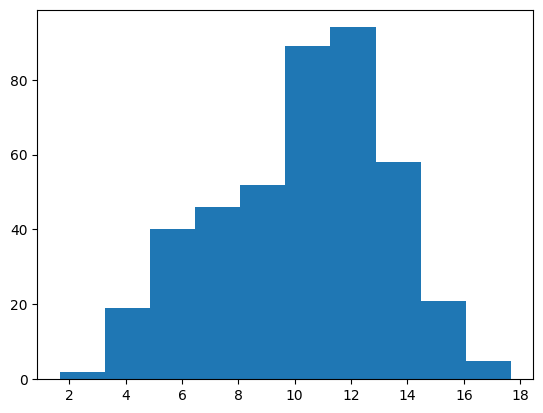

In [6]:
%pylab inline
hist(D[:, 0])
show()

Mit Matplotlib Pyplot lassen sich viele verschiedene Grafiken erstellen.

In [7]:
import matplotlib.pyplot as plt

Zum Beispiel kannst du dir anschauen, ob zum Beispiel eher ältere oder jüngere Hunde krank sind, in dem du auf der x-Achse das Alter aufträgst und auf der y-Achse den Gesundheitszustand. In dem abgebildeten Plot können wir keinen Unterschied zwischen alten und jungen Hunden erkennen.

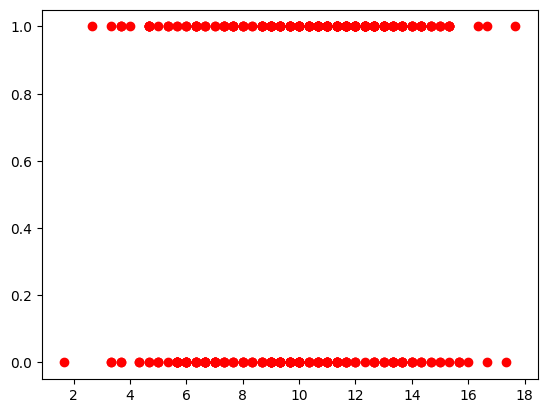

In [8]:
plt.plot(D[:, 0], D[:, -1], 'ro')

Wenn wir uns die Herzfrequenz (8. Merkmal) anschauen, sehen wir, dass Hunde mit einer niedrigeren Herzrate eher krank sind als Hunde mit einer höheren Herzrate. Wir sehen auch, dass dies nur eine Tendenz ist und es sehr viel Überlappung zwischen den zwei Klassen (krank und gesund) bezüglich der Herzfrequenz gibt.

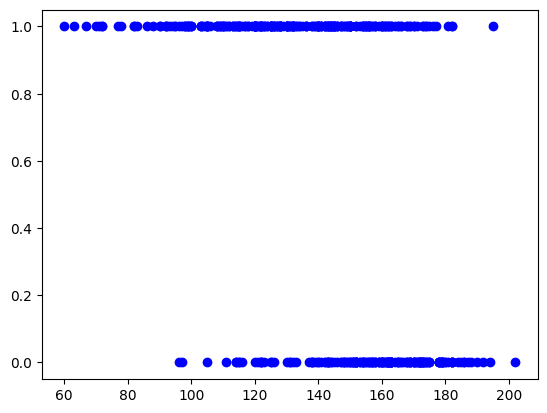

In [9]:
plt.plot(D[:, 7], D[:, -1], 'bo')